<a href="https://colab.research.google.com/github/raphaelreinauer/Convolutional-Neural-Networks/blob/master/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.utils import shuffle


from keras.datasets import mnist

In [24]:
# Usefull functions

def y2indicator(y):
    N = len(y)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind

def error_rate(p, t):
    return np.mean(p != t)

def flatten(X):
    N = X.shape[-1]
    flat = np.zeros((N,32*32*3))
    for i in range(N):
        flat[i] = X[:,:,:,i].reshape(32*32*3)
    return float
# load svhn_cropped dataset, see:
# https://www.tensorflow.org/datasets/overview
import tensorflow_datasets as tfds

ds = tfds.load('svhn_cropped', split='train', shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteN9A3AQ/svhn_cropped-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteN9A3AQ/svhn_cropped-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteN9A3AQ/svhn_cropped-extra.tfrecord


Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [48]:
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
    print(image)
    print(type(image), type(label), label)

image
<class 'str'> <class 'str'> label


In [0]:
# load MNIST data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
print("Train size:")
print(np.shape(X_train))
print(np.shape(y_train))

print("Test size:")
print(np.shape(X_test))
print(np.shape(y_test))

Train size:
(60000, 28, 28)
(60000,)
Test size:
(10000, 28, 28)
(10000,)


In [49]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test', 
    batch_size=-1, 
    as_supervised=True,
))

print(type(image), image.shape)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.
<class 'numpy.ndarray'> (10000, 28, 28, 1)


16000
signal:(18434,)


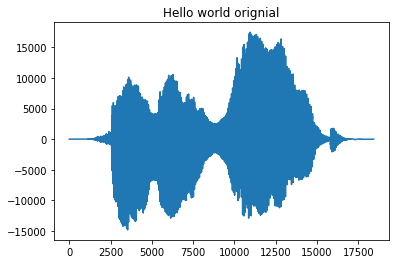

noecho signal:(18436,)


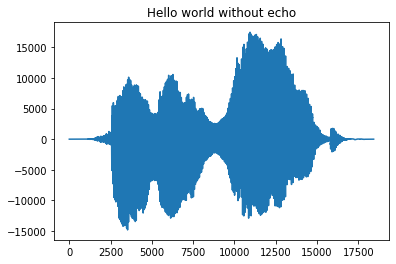

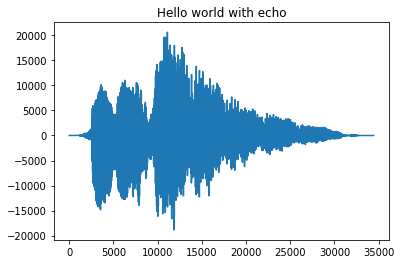

In [10]:
## Convolution with audio ##
import wave
import sys

from scipy.io.wavfile import read, write

signal = read('/content/drive/My Drive/big_data_machine_learning/helloworld.wav','r')

print(signal[0])

signal = signal[1]

print(f'signal:{signal.shape}')
plt.plot(np.array(signal))
plt.title("Hello world orignial")
plt.show()


delta = np.array([1.,0.,0.])
noecho = np.convolve(signal,delta)

print(f'noecho signal:{noecho.shape}')

plt.plot(noecho)
plt.title("Hello world without echo")
plt.show()

write('noecho.wave',16000, noecho.astype(np.int16))


filter_echo = np.zeros(16000)

filter_echo[0] = 1
filter_echo[4000] = .6
filter_echo[8000] = .3
filter_echo[12000] = .2
filter_echo[15999] = .1
echo = np.convolve(signal,filter_echo)

plt.plot(echo)
plt.title("Hello world with echo")
plt.show()

write('echo.wave',16000, echo.astype(np.int16))

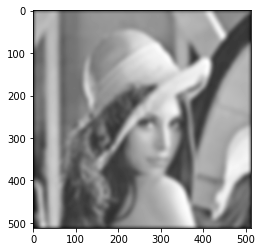

output shape:(512, 512), input_shape:(512, 512)


In [2]:
## Gaussian Blur ##

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

img = mpimg.imread('/content/drive/My Drive/big_data_machine_learning/lena.png')

#plt.imshow(img)
#plt.show()

bw = img.mean(axis=2)

#plt.imshow(bw,cmap='gray')
#plt.show()

# creat gaussian filter
W = np.zeros((20,20))

for i in range(20):
    for j in range(20):
     dist = (i-9.5)**2 + (j-9.5)**2
     W[i,j] = np.exp(-dist/50)

#plt.imshow(W, cmap='gray')
#plt.show()

out = convolve2d(bw, W,mode='same')

plt.imshow(out,cmap='gray')
plt.show()

print(f'output shape:{out.shape}, input_shape:{bw.shape}')

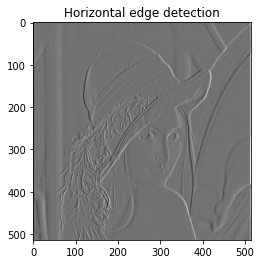

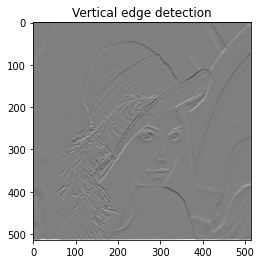

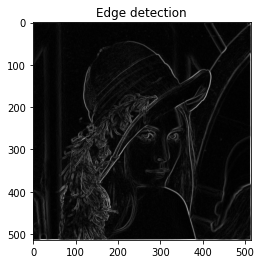

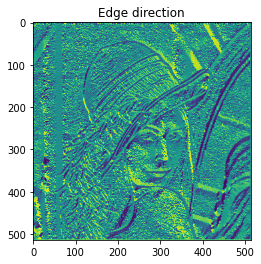

In [11]:
Hx = np.array([
               [-1,0,1],
               [-2,0,2],
               [-1,0,1],
], dtype=np.float32)

Hy = np.array([
               [-1,-2,-1],
               [0,0,0],
               [1,2,1],
], dtype=np.float32)

#  Horizontal edges
Gx = convolve2d(bw, Hx)

plt.show

plt.title('Horizontal edge detection')
plt.imshow(Gx, cmap='gray')
plt.show()

# Vertical edges
Gy = convolve2d(bw, Hy)

plt.title('Vertical edge detection')
plt.imshow(Gy, cmap='gray')
plt.show()

# Edges
G = np.sqrt(Gx**2 + Gy**2)
plt.title('Edge detection')
plt.imshow(G, cmap='gray')
plt.show()

# Edge direction
theta = np.arctan2(Gy,Gx)
plt.title('Edge direction')
plt.imshow(theta)
plt.show()

In [23]:
!pip install speech_data

ERROR: Could not find a version that satisfies the requirement speech_data (from versions: none)
ERROR: No matching distribution found for speech_data


In [22]:
# Speech recognition

import speech_data

learning_rate = 0.0001
training_iters = 300000

batch = word_batch = speech_data.mfcc_batch_generator(64)


ModuleNotFoundError: ignored